In [1]:
cd ../

/mnt/Stuff/Acads/UGP/mycode


In [2]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import IPython

In [3]:
import math

In [4]:
sr = 22050

In [5]:
Ust = 5
#F = psd.shape[0]
Fmin = librosa.note_to_hz('C2')
Fmax = librosa.note_to_hz('C7')
#Fmax = 20000

In [6]:
U = int(np.log2(Fmax/Fmin) * 12*Ust +1)

In [7]:
def uf(u,Fmin,Ust):
    return Fmin * np.power(2,(u)/(12*Ust))

In [13]:
u = np.arange(U)
uf0 = uf(u,Fmin,Ust)

In [8]:
note = uf(np.arange(int(np.log2(Fmax/Fmin) * 12*1 +1)) , Fmin,1)

In [10]:
stuff = np.load('/mnt/data/datasets/outs/out_LizNelson_Rainfall.npz')
HF0 = stuff['arr_5']

In [39]:
stuff = np.load('/mnt/data/datasets/outs/out_MatthewEntwistle_TheFlaxenField.npz')
HF0 = stuff['arr_5']

In [95]:
stuff = np.load('/mnt/data/datasets/outs/out_Phoenix_BrokenPledgeChicagoReel.npz')
HF0 = stuff['arr_5'][:,10*50:11*50]

In [118]:
stuff = np.load('/mnt/data/datasets/outs_hf/out_Phoenix_BrokenPledgeChicagoReel.npy')
HF0 = stuff[:,10*50:11*50]

In [24]:
stuff = np.load('/mnt/Stuff/Acads/UGP/mycode/outputs/out_amy_1_01.npz')
HF0 = stuff['arr_5']

In [175]:
stuff = np.load('/mnt/Stuff/Acads/UGP/mycode/outputs/out_amy_2_03.npz')
HF0 = stuff['arr_5']

In [131]:
stuff = np.load('/mnt/Stuff/Acads/UGP/mycode/outputs/out_heycat_1_03.npz')
HF0 = stuff['arr_5']

In [21]:
stuff = np.load('outputs/LizNelson_Rainfall_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [9]:
stuff = np.load('outputs/out_amy_1_01_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [198]:
stuff = np.load('outputs/out_amy_2_03_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [132]:
stuff = np.load('outputs/out_heycat_1_03_split.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

In [29]:
stuff = np.load('outputs/out_LizNelson_Rainfall_v.npz')
HPHI_bg = stuff['arr_0']
HPHI_voc = stuff['arr_1']
HF0_bg = stuff['arr_2']
HF0_voc = stuff['arr_3']
WM = stuff['arr_4']
HM = stuff['arr_5']
SX = stuff['arr_6']

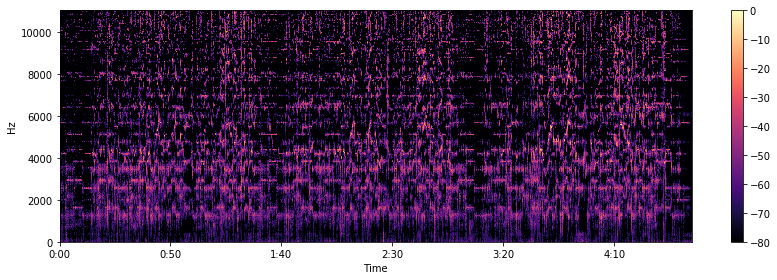

In [31]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

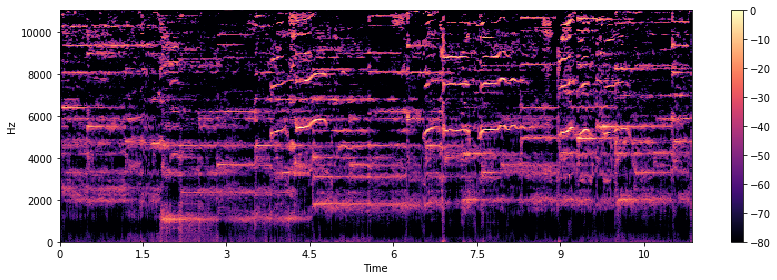

In [64]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

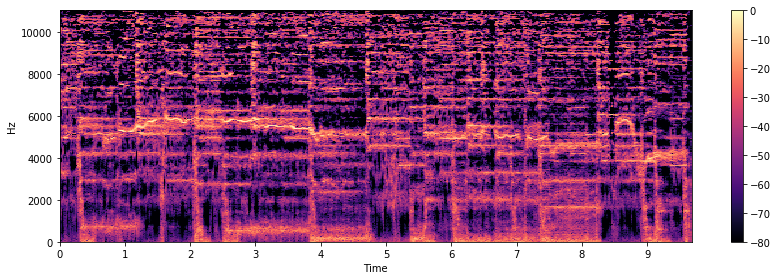

In [134]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

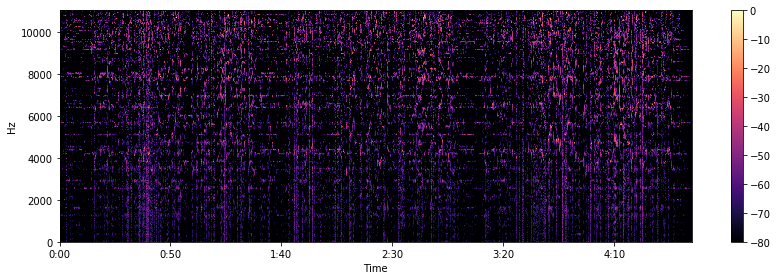

In [29]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_voc, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

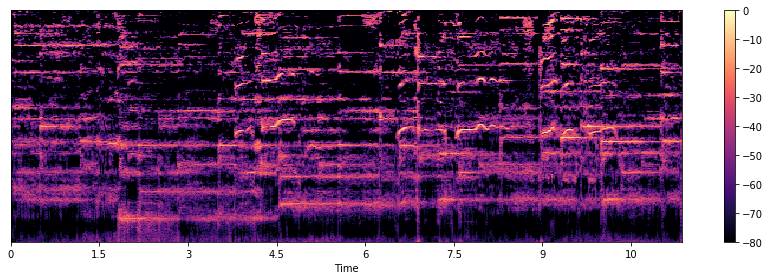

In [26]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_coords=np.arange(301),x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

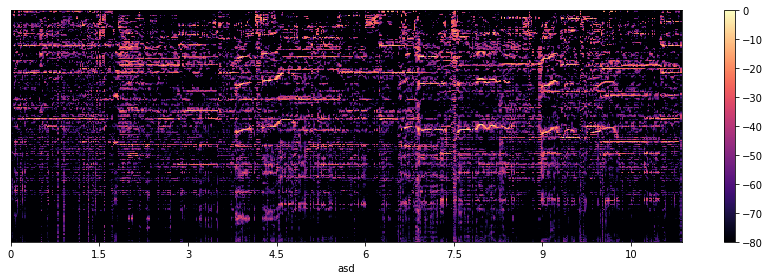

In [23]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_voc, ref=np.max),
                           y_coords = np.arange(301),x_axis='time', sr=sr,hop_length=441)
plt.xlabel('asd')
plt.colorbar()
plt.tight_layout()

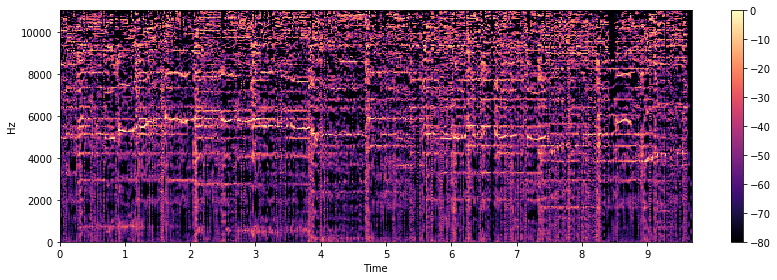

In [133]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_voc, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

In [27]:
N = HF0.shape[1]

In [28]:
N

568

In [70]:
fund_bad = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0[:,i])
    mi = np.argwhere(HF0[:,i] == m)
    for x in mi:
        fund_bad[x,i] = m

In [74]:
fund_bad = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0_voc[:,i])
    mi = np.argwhere(HF0_voc[:,i] == m)
    for x in mi:
        fund_bad[x,i] = m

In [77]:
predict = np.zeros([61,N])
for j in range(N):
    start =0
    predict[0,j] = np.amax(fund_bad[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        predict[i,j] = np.amax(fund_bad[start-2:start+2+1,j])
        if predict[i,j] < 5:
            predict[i,j] = 0
        i+=1
        start = i*5
    predict[i,j] = np.amax(fund_bad[start-2:start,j])

In [6]:
a = np.array([1,2,3])
np.argwhere(a==2)[0][0]

1

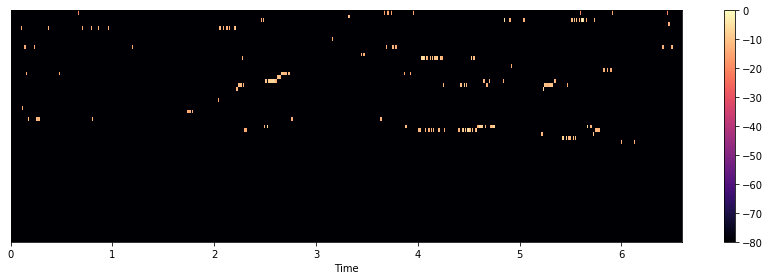

In [78]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

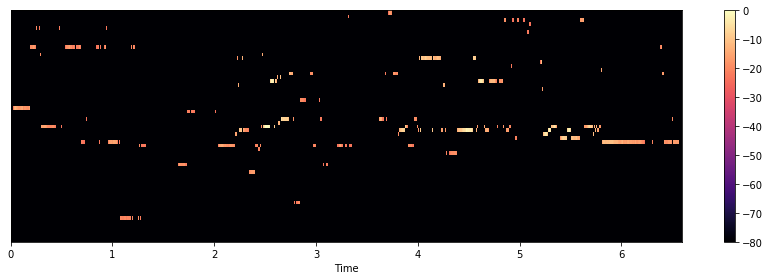

In [54]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

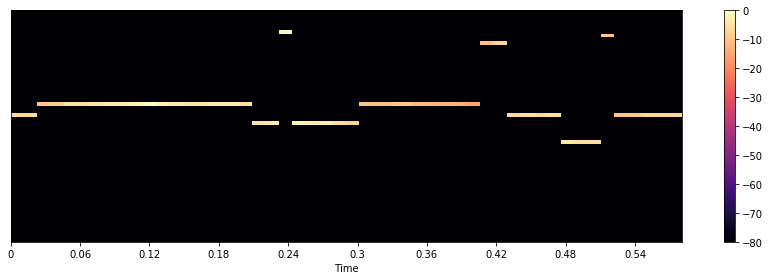

In [107]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

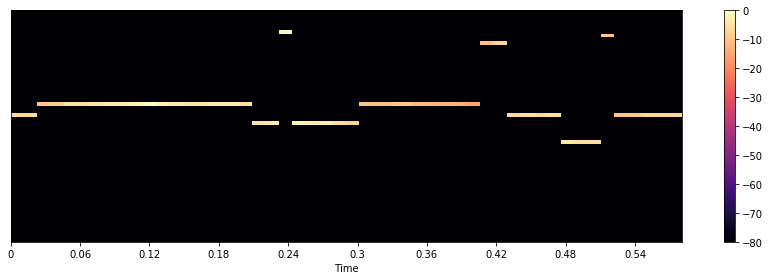

In [123]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

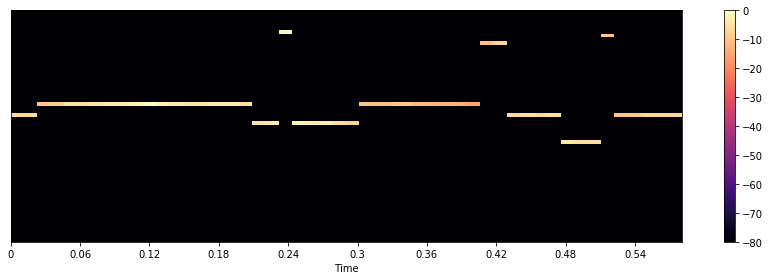

In [138]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

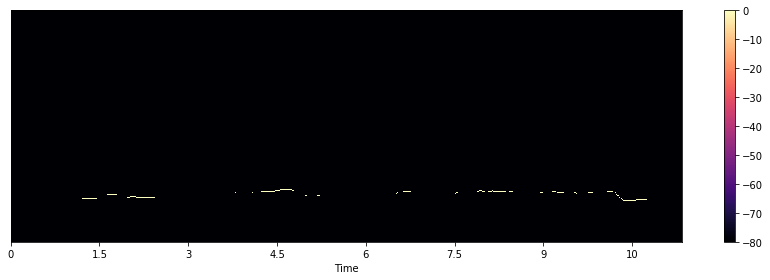

In [61]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(grmat, ref=np.max),
                           x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

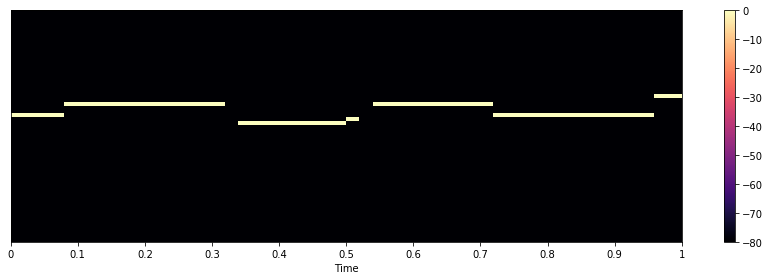

In [140]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(gl, ref=np.max),
                           x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

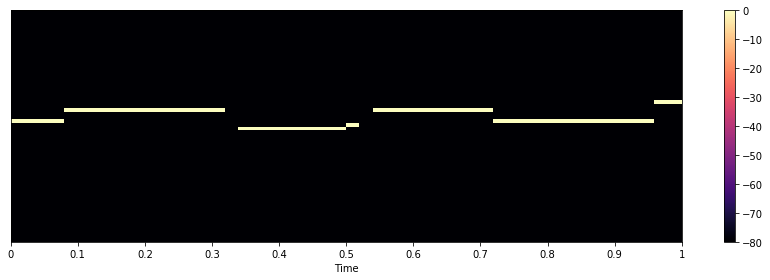

In [100]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(grmat, ref=np.max),
                           x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

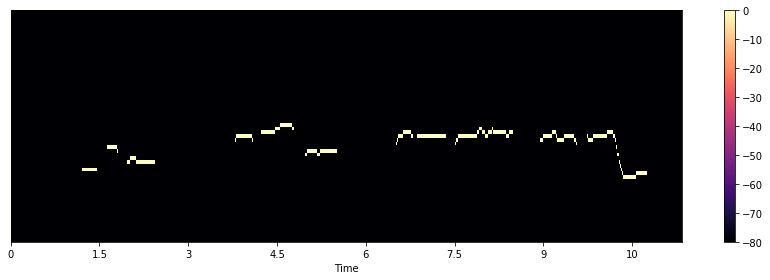

In [80]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(grmat, ref=np.max),
                           x_axis='time', sr=sr,hop_length=441)
plt.colorbar()
plt.tight_layout()

ground

In [55]:
liz_ground = "/mnt/Stuff/Acads/UGP/mycode/ground_voc/amy_1_01.npy"
gl = np.load(liz_ground)

In [91]:
gl = gl[10*50:11*50]

In [60]:
gl.shape

(567,)

In [79]:
grmat = np.zeros([62,gl.shape[0]])
for i in range(gl.shape[0]):
    if gl[i]!=0:
        grmat[int(max(gl[i] -37, 0)) , i] +=1

In [94]:
gl.shape

(50,)

In [73]:
n=0
acc = 0
for i in range(N-1):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        #n-=1
        continue
    if pr.size==0:
        #n-=1
        continue

    x = np.min(abs(pr - gl[i]))
    n+=1

    if x%12==0:
        acc+=1
acc/n

0.38162544169611307

In [69]:
n=0
acc = 0
for i in range(N-1):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        #n-=1
        continue
    if pr.size==0:
        #n-=1
        continue

    x = np.min(abs(pr - gl[i]))
    n+=1

    if x%12 == 0:
        acc+=1
acc/n

0.4416961130742049

In [126]:
n=0
acc = 0
for i in range(N-1):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        #n-=1
        continue
    if pr.size==0:
        #n-=1
        continue

    x = np.min(abs(pr - gl[i]))
    n+=1

    if x - 36== 0:
        acc+=1
acc/n

0.16607773851590105

In [130]:
n=N
acc = 0
for i in range(N-1):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))

    if x %12 == 0:
        acc+=1
acc/n

0.38028169014084506

In [171]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) -36 == 0:
        acc+=1
acc/n

0.6936416184971098

In [127]:
n=N
acc = 0
for i in range(N-1):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))

    if x %12 == 0:
        acc+=1
acc/n

0.44014084507042256

In [165]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) %12 == 0:
        acc+=1
acc/n

0.5664739884393064

In [174]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) -36 == 0:
        acc+=1
acc/n

0.4682080924855491

In [182]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) %12 == 0:
        acc+=1
acc/n

0.6451612903225806

In [201]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) %12 == 0:
        acc+=1
acc/n

0.4700460829493088

In [54]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]

    if gl[i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[i]))
    #print(x)

    if (x) %12 == 0:
        acc+=1
acc/n

0.5974586665358387

In [79]:
n=N
acc = 0
for i in range(N-2):
    min = np.max
    pr = np.nonzero(predict[:,i])[0]
    try:
        np.nonzero(gl[:,i])[0][0]
    except: 
        n-=1
        continue
        
    
    if gl[np.nonzero(gl[:,i])[0][0],i] == 0:
        n-=1
        continue
    if pr.size==0:
        continue

    x = np.min(abs(pr - gl[np.nonzero(gl[:,i])[0][0],i]))
    #print(x)

    if (x) %12 == 0:
        acc+=1
acc/n

0.0

Raw Chroma acc

In [39]:
def RPA():
    n=N
    acc = 0
    for i in range(N):
        min = np.max
        pr = np.nonzero(predict[:,i])[0]
        
        if gl[i] == 0:
            n-=1
            continue
        if pr.size==0:
            continue
        
        x = np.min(abs(pr - gl[i]))
        
        if x == 0:
            acc+=1
    return acc/n

In [40]:
def RCA():
    n=N
    acc = 0
    for i in range(N):
        min = np.max
        pr = np.nonzero(predict[:,i])[0]
        
        if gl[i] == 0:
            n-=1
            continue
        if pr.size==0:
            continue
        
        x = np.min(abs(pr - gl[i]))
        
        if x % 12 == 0:
            acc+=1
    return acc/n

In [124]:
def song(sp, gp):

    HF0 = np.load(sp)
    #HF0 = HF0['arr_0']
    ground = np.load(gp)
    #print(gp)
    T = HF0.shape[1]
    # if T != ground.shape[0]:
    #     print(T, ground.shape[0])
    #     print('ground dimension error')

    gr = np.zeros([61,T])
    for t in range(T):
        if ground[t] != 0:
            gr[int(ground[t]) , t] = 1
            #print(int(ground[t] ))

    patches_size = 50
    number_of_patches = math.floor(T/patches_size)
    # print(number_of_patches)

    x = np.zeros([number_of_patches,patches_size,301])
    y = np.zeros([number_of_patches,patches_size,61])

    j = 0
    i=0
    while j < number_of_patches:
#         if i%patches_size == 0 and i !=0:
#             j+=1
#         if j +1 == number_of_patches:
#             break
        #if j == 10: print(i)
        x[j] = np.swapaxes(HF0[:,i:i+patches_size] , 0 , 1)
        y[j] = np.swapaxes(gr[:,i:i+patches_size] , 0,1)
        i = i + patches_size
        j+=1
    # print(y.shape)
    return x , y

In [125]:
def generator(names):
    sp = '/mnt/data/datasets/outs_hf/out_'
    gp = 'ground/'
    indices = np.arange(names.shape[0])
    while True:
        np.random.shuffle(indices)

        # if train:
        #     names = train_names
        # else:
        #     names = val_names
        count=0
        batch_size = 10
        patch_size = 50
        x_train_batch = np.zeros([batch_size , 20 , patch_size , 301 , 1 ])
        y_train_batch = np.zeros([batch_size , patch_size * 20 , 61])
        batch_count = 0
        for i in indices:
            name = names[i]
            name = 'Phoenix_BrokenPledgeChicagoReel.npz'
            print(name)
            x, y = song(sp + name[:-1] + 'y', gp + name[:-1] + 'y')

            return x , y
            number_of_patches = 20
            

            i = 0
            while (i+1)*number_of_patches <= x.shape[0]:
                count+=1


                x_train = np.reshape(
                            x[i*number_of_patches : (i+1)*number_of_patches,:,:] ,
                            [20 , patch_size , 301 , 1 ])
                y_train = np.zeros([number_of_patches * patch_size , 61])
                for j in range(number_of_patches):
                    y_train[j*patch_size : (j+1)*patch_size,  : ] = y[i+j]

                #print(y_train.shape)
                y_train = np.reshape(
                            y_train, [number_of_patches * patch_size , 61])

                i+=1

                if batch_count < batch_size:
                    x_train_batch[batch_count] = x_train
                    y_train_batch[batch_count] = y_train
                    batch_count +=1
                else:
                    batch_count = 0
                    return x_train_batch, y_train_batch


        print()
        print(count)
        print()

In [126]:
names = np.load('names.npy')
l = names.shape[0]
train_names = names#[:int(0.8*l)]
val_names = names[int(0.8*l):]
x , y = generator(train_names)

Phoenix_BrokenPledgeChicagoReel.npz


In [127]:
x.shape

(310, 50, 301)

In [128]:
HF0 = np.swapaxes(x[10],0,1)

In [139]:
gl = np.swapaxes(y[10],0,1)

In [60]:
gl[np.nonzero(gl[:,2])[0][0],2]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [62]:
np.nonzero(gl[:,3])[0]

array([], dtype=int64)